#### 基分类器和组合分类器误差比较

若二元分类器误差：0.35，数量：25，则基分类器的误差： 0.060444913567


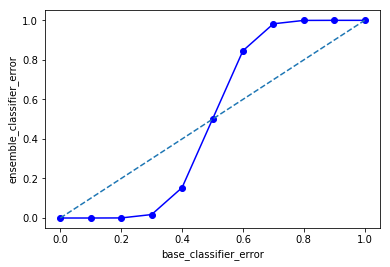

In [1]:
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt


def calc_ensemble_classifier_error(base_classifier_error, base_classifier_number):
    """
    计算基分类器的误差
    :params base_classifier_error: 二元分类器误差
    :params base_classifier_number: 二元分类器数量
    :return: 基分类器的误差
    """
    ensemble_classifier_error = 0.0
    votes = base_classifier_number / 2 + base_classifier_number % 2  # 投票数
    for i in range(votes, (base_classifier_number + 1)):
        ensemble_classifier_error += comb(base_classifier_number, i) * np.power(base_classifier_error, i) * np.power(1 - base_classifier_error, base_classifier_number - i)
    return ensemble_classifier_error


print '若二元分类器误差：0.35，数量：25，则基分类器的误差：', calc_ensemble_classifier_error(0.35, 25)

base_classifier_errors = np.linspace(0.0, 1.1, 11, endpoint=False)
ensemble_classifier_errors = [calc_ensemble_classifier_error(basic_erro, 25) for basic_erro in base_classifier_errors]
plt.plot(base_classifier_errors, ensemble_classifier_errors, 'ob-')
plt.plot(np.linspace(0.0, 1.1, 11, endpoint=False), np.linspace(0.0, 1.1, 11, endpoint=False), '--')
plt.xlabel('base_classifier_error')
plt.ylabel('ensemble_classifier_error')
plt.show()